In [ ]:
# 지능정보 SW개발 - Python
#       [수집]             [관리]         [분석/모델링]        [시각화]
# Crawler - URL             DBMS         비정형(텍스트)          react
# Scraping - 데이터 파싱     ORM     Tokenizing->Vectorizing
#                                       분류       군집
#                                   Naive Bayes
#                                   regression(linear, logistic) => NN / SLP / MLP / DNN

# Naive Bayes
Bayes Theorem 이용 - 시퀀스를 이용해 다음 글자, 단어, 문장을 예측

Reference: [Introduction to Information Retrieval](https://nlp.stanford.edu/IR-book/)

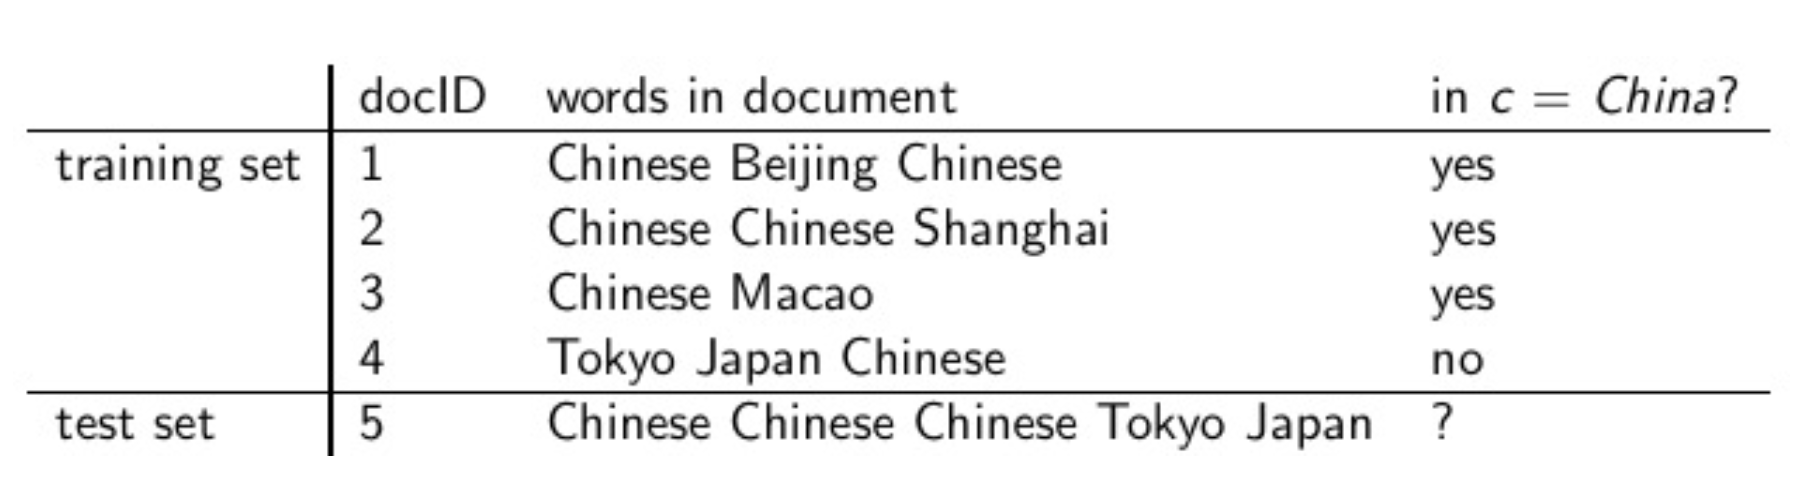

In [ ]:
from nltk import download
download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
D = [(1, 'Chinese Beijing Chinese', 'yes'),
     (2, 'Chinese Chinese Shanghai', 'yes'),
     (3, 'Chinese Macao', 'yes'),
     (4, 'Tokyo Japan Chinese', 'no'),
     (5, 'Chinese Chinese Chinese Tokyo Japan', None)]

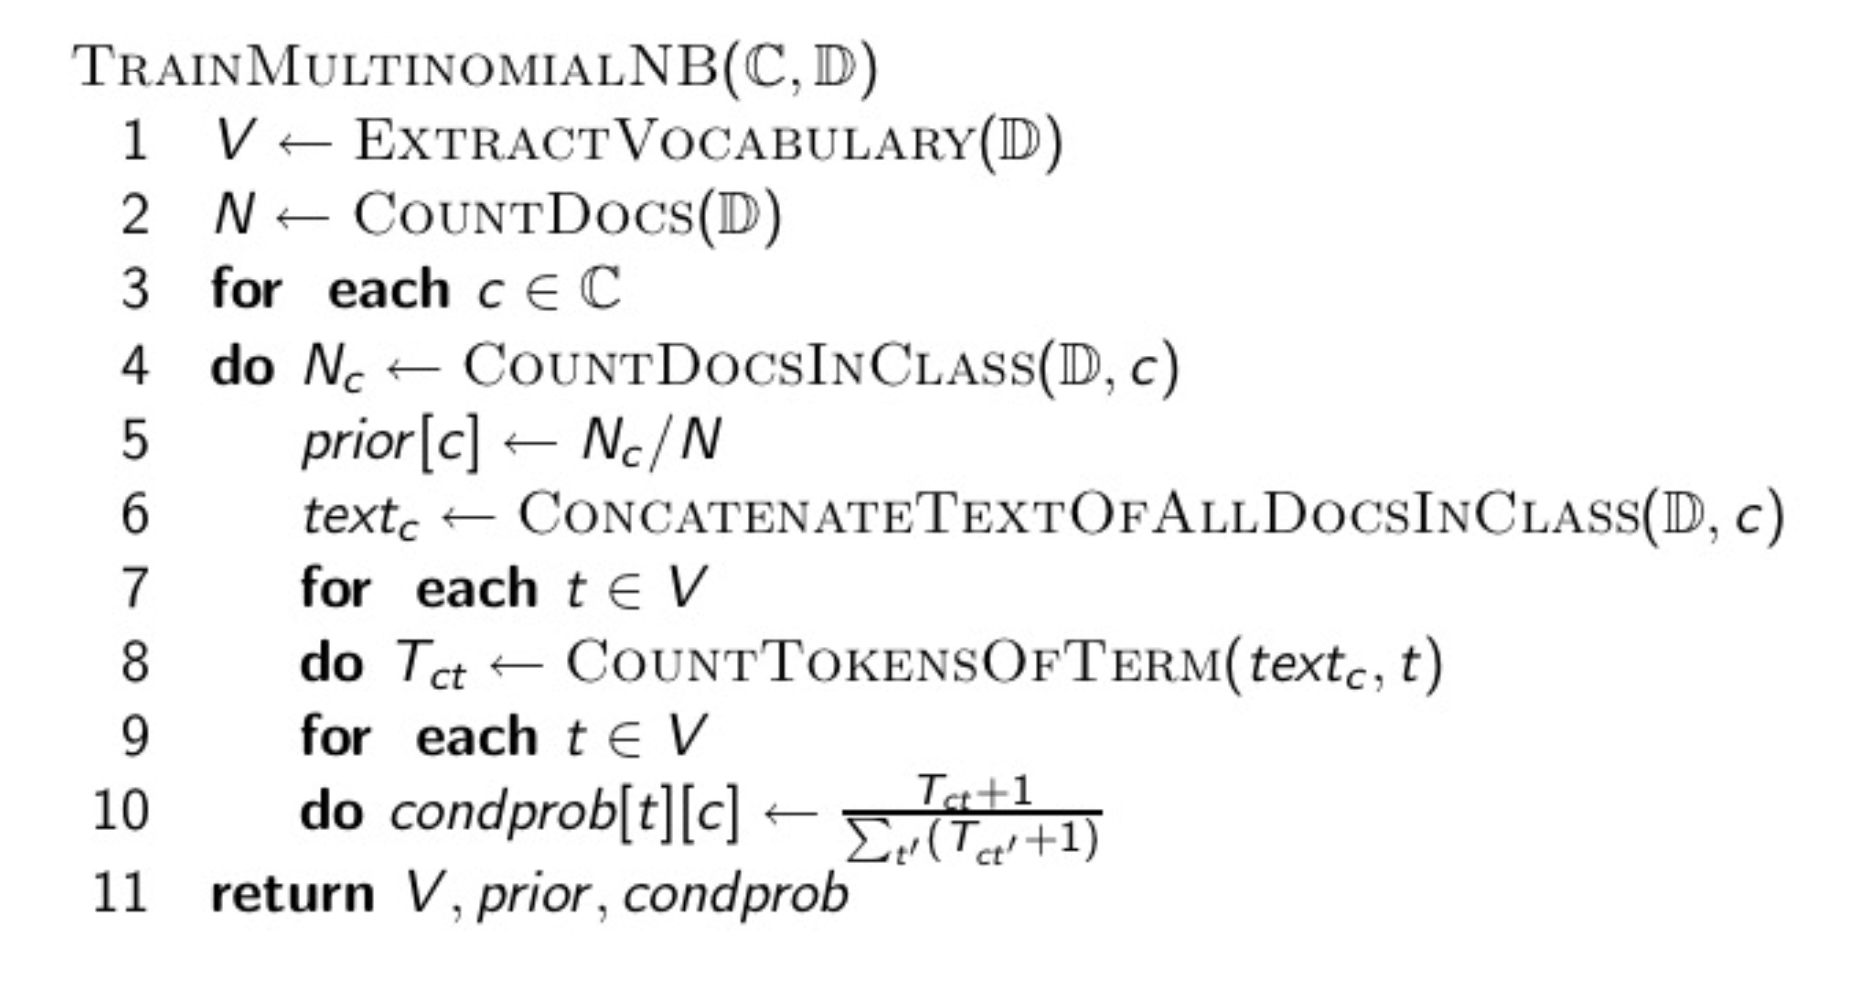

In [ ]:
C = list(set(x[-1] for x in D[:-1]))

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

def train(c, d):
    # 1
    V = list()
    for x in d:
        # Preprocessing - Normalizing(->lower), word_tokenize
        for t in word_tokenize(x[1].lower()): # d 아니고 x
            if t not in V:
                V.append(t)

    # 2
    N = len(d)

    # 3
    prior = {}
    condprob = {}
    for category in c:
    # 4
        Nc = len(list(filter(lambda x:x[-1] == category, d))) # filter => list(filter)
    # 5
        prior[category] = Nc/N
    # 6
        textc = '\n'.join([x[1] for x in d if x[-1] == category]) # if 뒤에 추가
        textc = Text(word_tokenize(textc.lower()))
    # 7, 9
        for t in V: # 9 전체 유니크한 단어만큼 반복
    # 8
            Tct = textc.count(t)
    # 10
            if t not in condprob:
                condprob[t] = {}
            condprob[t][category] = (Tct+1)/(textc.vocab().N()+len(V))
            # c가 아니고 category,             Tct가 아니고 textc   textc.vocab().B() 아니고 len(V)
    # 11
    return V, prior, condprob

Vocabulary, Prior, CondProb = train(C, D[:-1])
Vocabulary, Prior, CondProb

(['chinese', 'beijing', 'shanghai', 'macao', 'tokyo', 'japan'],
 {'yes': 0.75, 'no': 0.25},
 {'chinese': {'yes': 0.42857142857142855, 'no': 0.2222222222222222},
  'beijing': {'yes': 0.14285714285714285, 'no': 0.1111111111111111},
  'shanghai': {'yes': 0.14285714285714285, 'no': 0.1111111111111111},
  'macao': {'yes': 0.14285714285714285, 'no': 0.1111111111111111},
  'tokyo': {'yes': 0.07142857142857142, 'no': 0.2222222222222222},
  'japan': {'yes': 0.07142857142857142, 'no': 0.2222222222222222}})

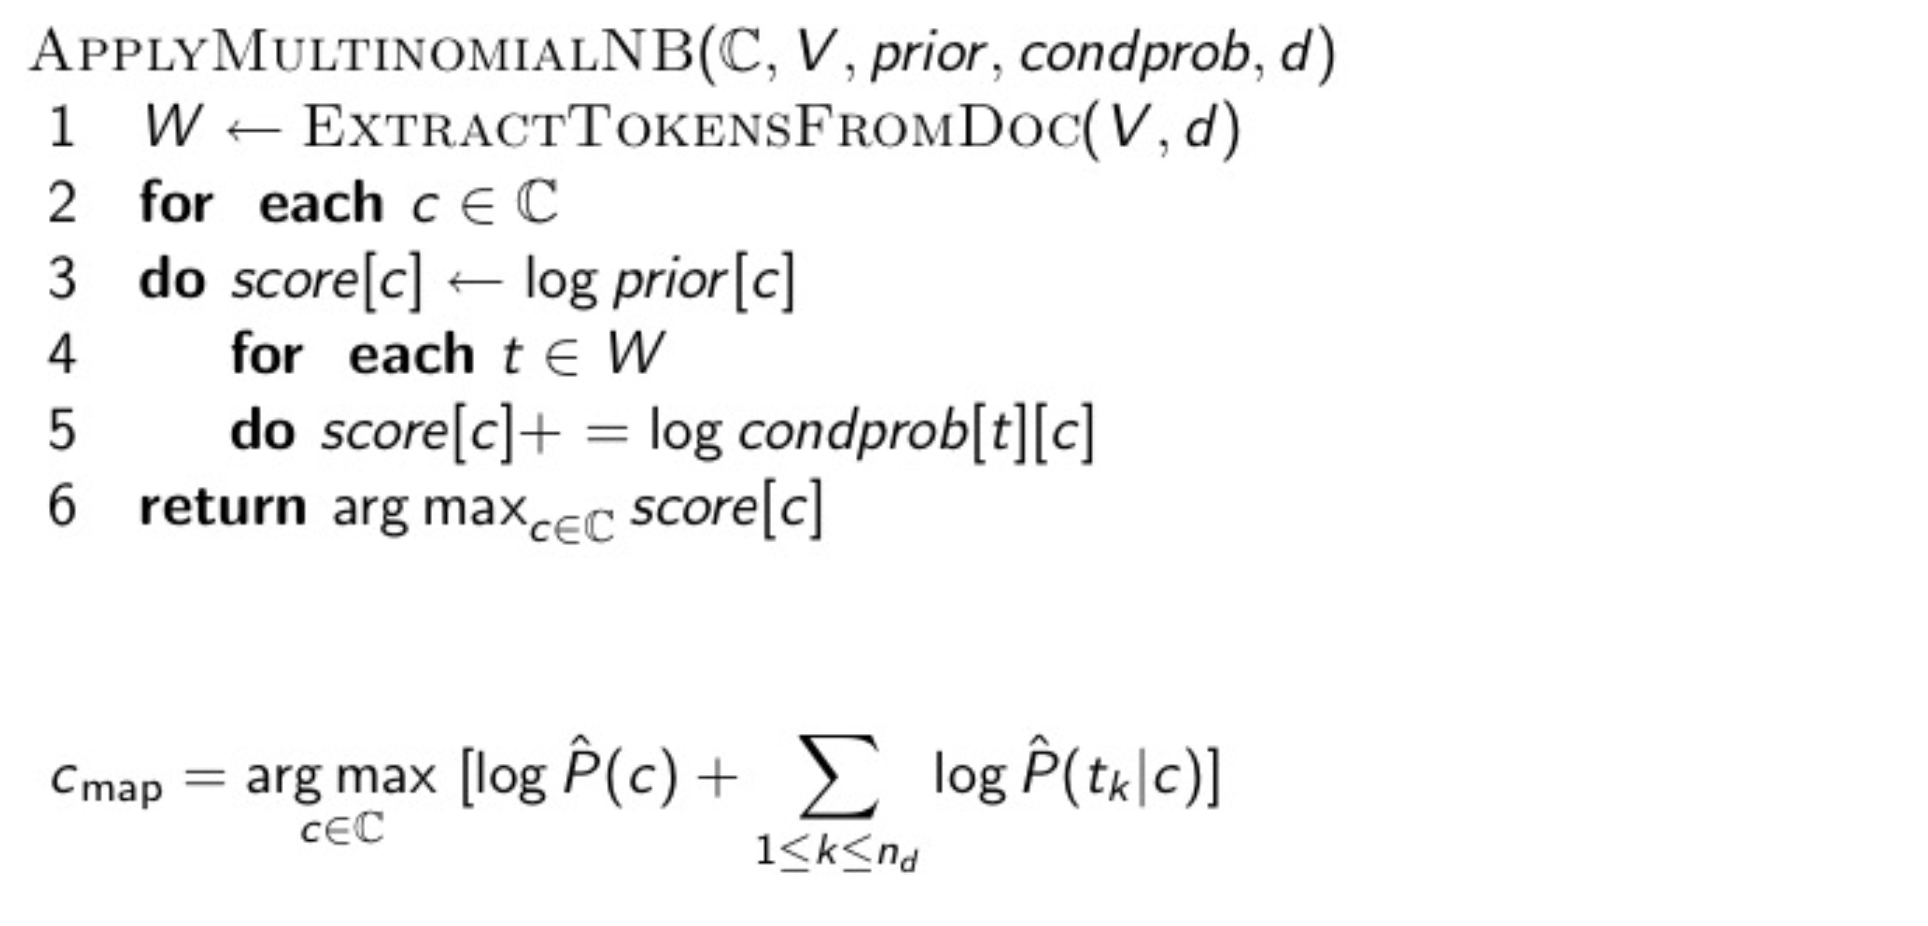

In [ ]:
from math import log

def test(c, V, prior, condprob, d):
    # 1
    W = list()
    for t in word_tokenize(d.lower()):
        if t in V: # not in W 삭제; token이 다 필요
            W.append(t)
    # 2
    score = dict()
    for category in C:
    # 3
        score[category] = log(prior[category])
    # 4
        for t in W:
    # 5
            score[category] += log(condprob[t][category])
    # 6
    return max(score, key=score.get), score

test(C, Vocabulary, Prior, CondProb, D[-1][1])

('yes', {'yes': -8.10769031284391, 'no': -8.906681345001262})

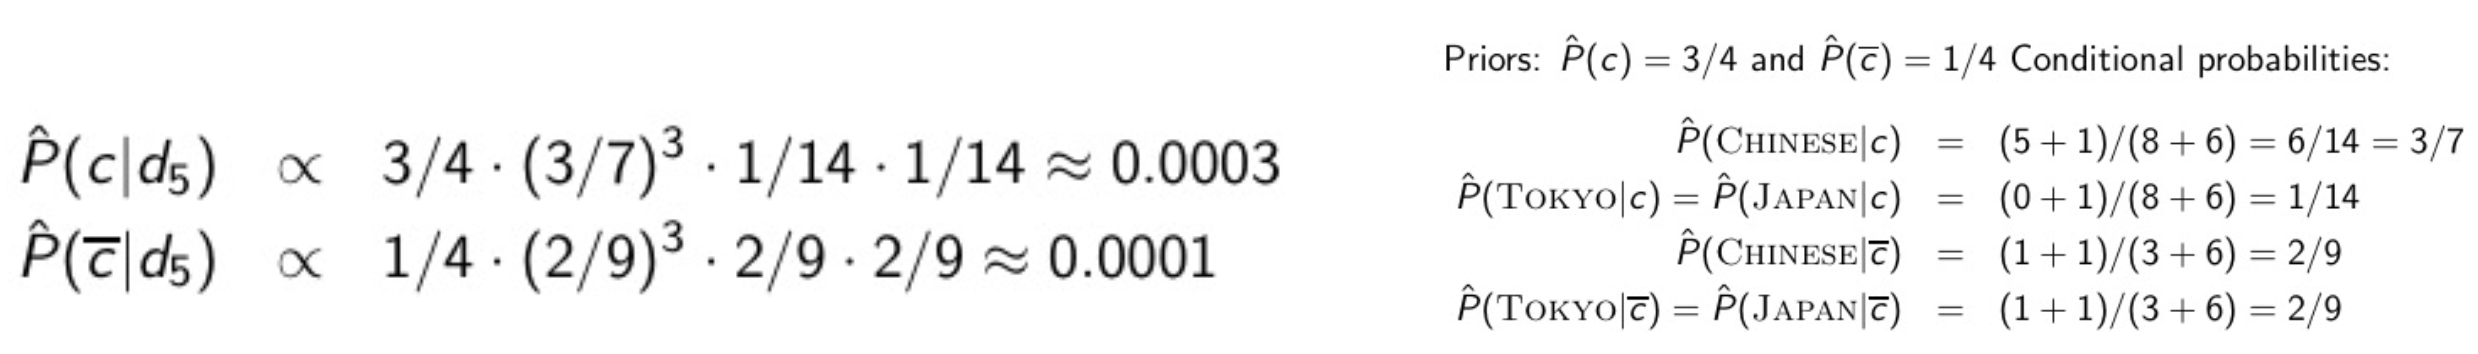